In [ ]:
!pip3 install torch # 로컬에서 pytorch Library를 이용하기 위해 설치

In [1]:
import torch 
import torch.nn as nn # Linear Regression을 이용할 클래스에 상속시키기 위하여 torch.nn을 import한다. 내부에는 ReLU, Softmax 등의 활성함수를 만들기 위한 함수가 존재한다.
import matplotlib.pyplot as plt # 그래프를 그리기 위한 matplotlib import
import numpy as np # numpy import

Text(0.5, 0, 'x')

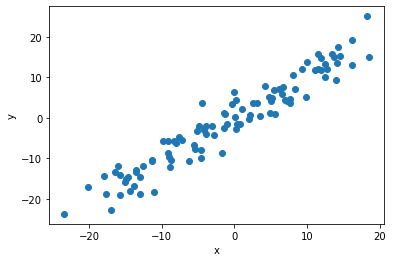

In [5]:
X = torch.randn(100, 1)*10 # 가우시안 정규분포 난수값 * 10 으로 초기화된 100 x 1 꼴의 tensor 생성, 데이터셋 역할을 할 것이다.
y = X + 3*torch.randn(100, 1) # 가우시안 정규분포 난수값 * 3 + X로 초기화된 100 x 1 꼴의 tensor 생성, target 역할을 할 것이다.
plt.plot(X.numpy(), y.numpy(), 'o') # 동그란 점을 찍어서 X와 y에 대한 그래프를 그릴 것이다.
plt.ylabel('y')
plt.xlabel('x') # 범례 이름짓기

In [20]:
class LR(nn.Module): # Linear, ReLU 등의 함수를 사용하기 위해 상속받는다. 딥러닝을 할 때에는 반드시 상속받고 시작해야 한다.
  def __init__(self, input_size, output_size):
    super().__init__() # 필수적인 부모 생성자(nn.Module의 생성자) 실행
    self.linear = nn.Linear(input_size, output_size) # 입력과 출력 특성의 개수를 매개변수로 받아서 선형변환의 Model을 만들어 준다.
  def forward(self, x): # 반드시 포함되어야 할 forward 함수이다. 다음 특성으로 계속 진행하며 오차를 줄여나가는 역할을 한다.
    pred = self.linear(x) # 입력받은 값에 대하여 다시 선형변환 실행
    return pred # 선형변환 된 값 반환

In [55]:
torch.manual_seed(1) # torch의 랜덤성을 통제해 주기 위해 선언해 주어야 한다. 이렇게 manual_seed를 선언해 두면 CPU를 통해 계산하는 무작위 연산은 모두 고정된 값이 나오게 된다.
model = LR(1, 1) # 입력 특성 1개, 출력 특성 1개의 model 생성
print(model) # model의 특성 보기 위한 출력

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [56]:
[w, b] = model.parameters() # 모델의 학습 가능한 매개변수들을 반환하는 parameters() 함수, weight(기울기)와 bias(노이즈)를 반환한다.
def get_params():
  return (w[0][0].item(), b[0].item()) # weight랑 bias가 한개씩이니까 그냥 첫번째 요소 반환

<class 'torch.nn.parameter.Parameter'> torch.Size([1, 1])
<class 'torch.nn.parameter.Parameter'> torch.Size([1])


In [57]:
def plot_fit(title): # 그래프 그리는 함수
  plt.title = title
  w1, b1 = get_params() # 매개변수 반환
  x1 = np.array([-30, 30]) # np array 생성
  y1 = w1*x1 + b1 # 반환받은 weight와 bias를 이용해 일차함수의 모델을 만들어 준다.
  plt.plot(x1, y1, 'r') # 빨간색 선으로 그린다.
  plt.scatter(X, y) # 산포그래프 그리기
  plt.show()

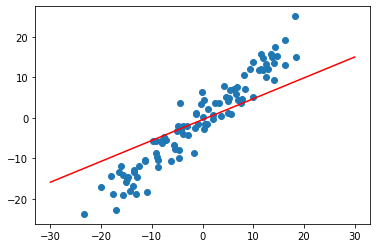

In [9]:
plot_fit('Initial Model')

In [16]:
criterion = nn.MSELoss() # Mean Sqaured Error를 구하기 위한 함수, 매개변수 두개를 받아서 ((예측값) - (정답))^2의 총 합을 반환한다.
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 
# 모델의 가중치를 갱신할 optimizer를 만든다. 확률적 경사 하강법(SGD)을 이용하며, Local Mimimum에 도달하기 위한 lr(Learning Rate) 매개변수도 적절한 값으로 설정해 주어야 한다.
# 값이 너무 크면 값이 무질서하게 움직이거나, 발산을 하고, 너무 작으면 최저점에 도달하기 까지 시간이 너무 오래 걸릴 수 있으니 적절하게 설정해 주어야 한다.

In [61]:
epochs = 100 # 몇번의 반복을 할건지 epoch 설정
losses = [] # loss를 담을 tensor 생성
for i in range(epochs): # 100번만큼 돌면서 forward와 backward를 실행한다.
  y_pred = model.forward(X) # 현재 데이터의 다음 선형변환 값 반환
  loss = criterion(y_pred, y) # 정답과의 MSELoss를 구한다.
  print("epoch:", i, "loss:", loss.item()) # i번째 시도에 대한 손실율(loss) 출력
  
  losses.append(loss) # 배열에 요소 추가
  optimizer.zero_grad() # 반드시 추가해야 하는 함수이다. zero_grad()가 없다면 변화율이 계속 누적되기 때문에, zero_grad() 함수로 다음 backward 진행 전에 변화율을 0으로 초기화해줘야 한다. 
  loss.backward() # 손실율을 매개변수(가중치)로 역전파
  optimizer.step() # 가중치 갱신

epoch: 0 loss: 35.384979248046875
epoch: 1 loss: 35.384979248046875
epoch: 2 loss: 35.384979248046875
epoch: 3 loss: 35.384979248046875
epoch: 4 loss: 35.384979248046875
epoch: 5 loss: 35.384979248046875
epoch: 6 loss: 35.384979248046875
epoch: 7 loss: 35.384979248046875
epoch: 8 loss: 35.384979248046875
epoch: 9 loss: 35.384979248046875
epoch: 10 loss: 35.384979248046875
epoch: 11 loss: 35.384979248046875
epoch: 12 loss: 35.384979248046875
epoch: 13 loss: 35.384979248046875
epoch: 14 loss: 35.384979248046875
epoch: 15 loss: 35.384979248046875
epoch: 16 loss: 35.384979248046875
epoch: 17 loss: 35.384979248046875
epoch: 18 loss: 35.384979248046875
epoch: 19 loss: 35.384979248046875
epoch: 20 loss: 35.384979248046875
epoch: 21 loss: 35.384979248046875
epoch: 22 loss: 35.384979248046875
epoch: 23 loss: 35.384979248046875
epoch: 24 loss: 35.384979248046875
epoch: 25 loss: 35.384979248046875
epoch: 26 loss: 35.384979248046875
epoch: 27 loss: 35.384979248046875
epoch: 28 loss: 35.38497924804

Text(0.5, 0, 'epoch')

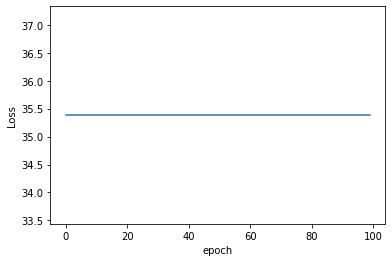

In [63]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
# 그래프 그리기, 원래라면 epoch이 올라갈 수록 Loss가 감소하는 모양이 나와야 할 것이다.

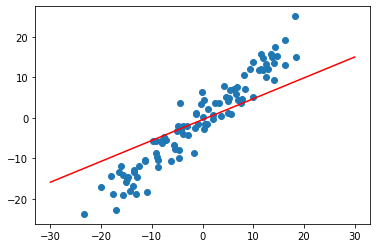

In [64]:
plot_fit("Trained Model")
# 학습된 모델에 대한 그래프. 제대로 작동 했다면 모델이 학습 데이터에 맞게 잘 나온것을 확인할 수 있을 것이다.